In [27]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_excel('manufacturing_emails_temporal_network.xlsx')
G = nx.Graph()

for index, row in df.iterrows():
    G.add_edge(row['node1'], row['node2'])

In [30]:
npadj = nx.to_numpy_matrix(G)

print(df)
print(npadj)

       node1  node2  timestamp
0          1      2          1
1          1      3          1
2          1      4          1
3          1      5          1
4          1      6          1
...      ...    ...        ...
82871      3     39      57787
82872      3     39      57788
82873     18     19      57789
82874      3     85      57790
82875     85     94      57791

[82876 rows x 3 columns]
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
N = G.number_of_nodes()
E = G.number_of_edges()
p = 2*E/(N*(N-1))
#alt nx.density(G)
ED = 2*E/(N)
#alt ED = np.average([d for n, d in G.degree()])

print("Number of nodes:\t" + str(N))
print("Number of edges:\t" + str(E))
print('Network density:\t' + str(p))
print('Average degree:\t\t' + str(ED))

Number of nodes:	167
Number of edges:	3250
Network density:	0.2344708174013419
Average degree:		38.92215568862275


/home/tim/Downloads/Enter/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


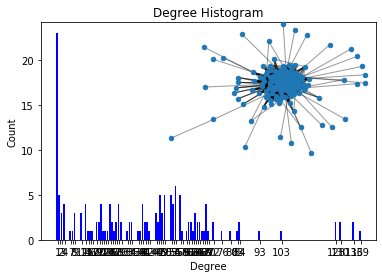

In [40]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()